## Credit Card Capstone Project
When analyzing credit cards companies customer churn, we will be predicting the variables which have a major impact on customer retention.

### Null Hypothesis
The variables do not have an effect on attrition rate of our credit card attrition rate.

### Alternate Hypothesis
The variables in this dataset have an effect on attrition rate and influence credit card cliental attrition

### What does churn stand for?
Churn in a business setting refers to losing an acquired, potentially profitable customer. The definition of churn can vary by industry (in Healthcare, dead people are considered churn while in finance, people with inactive cards are called churned).

#### Why do businesses want to prevent churn?
Acquiring a new customer is always more expensive than retaining an existing one. Hence, not letting them churn is the key to a sustained revenue stream.

In this analysis we can focus on customer retention programs and how can the company benefit from it.

#### Questions to answer while doing this analysis
<ol><li> Demographics </li>
    <li> Customer Account Information </li>
    <li> Correlation </li>
    </ol>

In [1]:
# import modules and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'white')

In [2]:
# importing Bankchurners.csv file to Jupyter notebook
df = pd.read_csv("BankChurners.csv")

In [3]:
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


### <ul> Exploratory Data Analysis </ul>

1) CLIENTNUM: Unique ID to represent each customer
 
2) Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0; Shows existing and non-existing customers ['Existing Customer', 'Attrited Customer']

3) Customer_Age: Demographic variable - Customer's Age in Years

4) Gender: Demographic variable - M=Male, F=Female (M / F)

5) Dependent_count: Demographic variable - Number of dependents. 

6) Education_Level: Demographic variable - Educational Qualification of the account holder 

7) Marital_Status: Information on customers marital status 

8) Income_Category: Demographic variable - Annual Income Category of the account holder 

9) Card_Category: Product Variable - Type of Card 

10) Months_on_book: Period of relationship with bank (measured by months) 

11) Total_Relationship_Count: Total no. of products held by the customer 

12) Months_Inactive_12_mon: No. of months inactive in the last 12 months 

13) Contacts_Count_12_mon: No. of Contacts in the last 12 months 

14) Credit_Limit: Credit Limit on the Credit Card

15) Total_Revolving_Bal: Total Revolving Balance on the Credit Card 

16) Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months) 

17) Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)

18) Total_Trans_Amt: Total Transaction Amount (Last 12 months) 

19) Total_Trans_Ct: Total Transaction Count (Last 12 months) 

20) Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)

21) Avg_Utilization_Ratio: Average Card Utilization Ratio

In [6]:
# While using the describe function I am able to analyze the csv file and provide its statistics. H
# Here we can view the count, mean, std, minimum, maximum and 25%, 50% and 75% of the bankchurners.csv file

df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [9]:
# Drop the last two columns 
# Over here I have dropped the last two columns as those columns are not of use to me in my analysis.
df_n=df.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis = 1)

In [10]:
df_n.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

After cleaning the data and eliminating the columns which are of no use, I will be focusing my analysis on demographics. Through demographics I will get a clear view at the gender population of our clients, the income our clients earn and what is our clients marital status? 

##### First let us look at the gender population and see how are our clients distributed within the company!

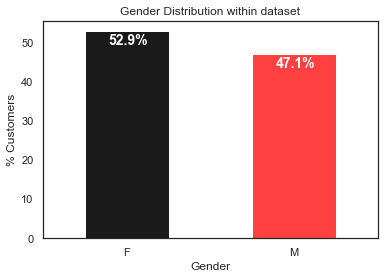

In [11]:
colors = ['#1A1A1A','#FF4040']
ax = (df_n['Gender'].value_counts()*100.0 /len(df_n)).plot(kind='bar', stacked = False, rot = 0, color = colors)
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution within dataset')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.14, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=14,
            color='White',
           weight = 'bold')

Here I am able to visualize that our clients are evenly distributed, however 52.9% of our clients consist of females and 47.1% are males

Text(0.5, 1.0, 'Marital Status of our Clients')

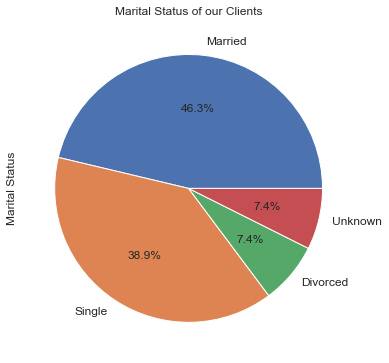

In [12]:
ax = (df_n['Marital_Status'].value_counts()*100.0 /len(df_n))\
.plot.pie(autopct='%.1f%%', labels = ['Married','Single','Divorced','Unknown'],figsize =(6,7), fontsize = 12 )                                                                           
ax.set_ylabel('Marital Status',fontsize = 12)
ax.set_title('Marital Status of our Clients', fontsize = 12)

Through the above pie chart, I am able to analyze that 46.3% of our clients are married and 38.9% of our clients are single whereas 7.4% are diviorced and the for the rest we do not have adequate information.

/Users/laksshayvohrra/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'How many months do the customers stay with our company?')

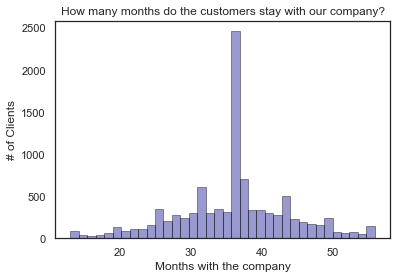

In [13]:
ax = sns.distplot(df_n['Months_on_book'], kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Clients')
ax.set_xlabel('Months with the company')
ax.set_title('How many months do the customers stay with our company?')

In [14]:
# how many months does a customer stay with our company?
np.median(df_n['Months_on_book'])

36.0

On average ~2500 a customer stays with our company for 36 months.

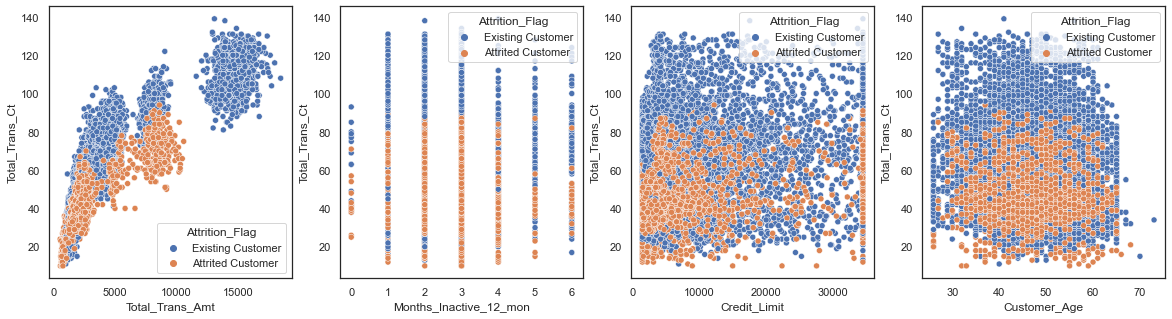

In [15]:
df_n=pd.concat([df['Customer_Age'],df['Total_Trans_Ct'],df['Total_Trans_Amt'],df['Months_Inactive_12_mon'],df['Credit_Limit'],df['Attrition_Flag']],axis=1)
fig,ax=plt.subplots(ncols=4,figsize=(20,5))

sns.scatterplot(data=df_n,y="Total_Trans_Ct",x="Total_Trans_Amt",hue="Attrition_Flag",ax=ax[0])
sns.scatterplot(data=df_n,y="Total_Trans_Ct",x="Months_Inactive_12_mon",hue="Attrition_Flag",ax=ax[1])
sns.scatterplot(data=df_n,y="Total_Trans_Ct",x="Credit_Limit",hue="Attrition_Flag",ax=ax[2])
_scat=sns.scatterplot(data=df_n,y="Total_Trans_Ct",x="Customer_Age",hue="Attrition_Flag",ax=ax[3])

From the 4 graphs above we can point out the following analysis:

1. The higher the customers spends annually, the customers are more likely to remain.
2. After 2-3 months of inactivity, the customers are more likely to leave.
3. The higher the credit limit is, the customers are more likely to remain.
4. Age distribution does not really matter, because the clusters are largely overlapped. Therefore comparing attiriton rate with customer age is not necessary
5. Almost all attrited customers used their cards below 100 times.

## CORRELATION

Now we will use the pearson method to complete the correlation of this dataset!
We have a mixed features within dataset; categorical and numerical. Thus to analyze both categorical and numerical we cannot simply use Pearson Coefficient. We will have to split the features into separate tables, and we measure numerical data correlation via Pearson, and categorical data via Cramer's V function.

In [16]:
# When cleaning the tables I have took the chance to seperate categorical and numerical variables.
# In this table we will only be able to locate the categorical variables
df_categorical=df.loc[:,df.dtypes==np.object]
df_categorical = df_categorical[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category','Card_Category','Attrition_Flag']]
df_categorical.head()

/var/folders/x6/nzby73792t956q8yhk8yst1r0000gn/T/ipykernel_9212/2463348346.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_categorical=df.loc[:,df.dtypes==np.object]


,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,M,High School,Married,$60K - $80K,Blue,Existing Customer
1,F,Graduate,Single,Less than $40K,Blue,Existing Customer
2,M,Graduate,Married,$80K - $120K,Blue,Existing Customer
3,F,High School,Unknown,Less than $40K,Blue,Existing Customer
4,M,Uneducated,Married,$60K - $80K,Blue,Existing Customer


In [30]:
#Converting Attrition Flag into attrited and exisitng customer columns
dummy = pd.get_dummies(df_categorical['Attrition_Flag'])

In [31]:
#View Attrited and existing customer variable
dummy.head(3)

,Attrited Customer,Existing Customer
0,0,1
1,0,1
2,0,1


In [32]:
#Combining df_categorical and dummy tables together
frames = [df_categorical,dummy]
result = pd.concat(frames,axis = 1)

In [87]:
#creating a numerical table 
df_numerical=df.loc[:,df.dtypes!=object]
df_numerical['Attrition_Flag']=df.loc[:,'Attrition_Flag']
oh=pd.get_dummies(df_numerical['Attrition_Flag'])
df_numerical=df_numerical.drop(['Attrition_Flag'],axis=1)
df_numerical= df_numerical.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis = 1)

df_numerical=df_numerical.drop(['CLIENTNUM'],axis=1)
df_numerical=df_numerical.join(oh)
df_numerical.head()

/var/folders/x6/nzby73792t956q8yhk8yst1r0000gn/T/ipykernel_9212/1453097744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['Attrition_Flag']=df.loc[:,'Attrition_Flag']


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrited Customer,Existing Customer
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,1
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,1
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1


In [67]:
#converting marital status into different columns and assigning these columns a binary value
dummy2 = pd.get_dummies(botht['Card_Category'])

dummy2.head()

dummymarital_status= pd.get_dummies(botht['Marital_Status'])

dummy_M = dummymarital_status.drop(['Unknown'],axis=1)

dummy_M.head()

,Divorced,Married,Single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,0
4,0,1,0


In [54]:
#Converting education level into different columns and assigning these columns a binary value 
dummyeducation_level = pd.get_dummies(botht['Education_Level'])

In [71]:
#Dropping the column Unknown
dummy3 = dummyeducation_level.drop(['Unknown'],axis=1)

In [72]:
dummy3.head()

,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated
0,0,0,0,1,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,0,1


In [92]:
frames = [df_numerical,dummy_M,dummy3]
botht = pd.concat(frames,axis = 1)

In [189]:
#Dropping column Existing
both=botht.drop(['Existing Customer'],axis=1)

In [187]:
#Renaming attrited customer column to attrited
both=botht.rename(columns={"Attrited Customer":"Attrited"})

In [190]:
#Viewing dataframe both
both

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Attrited Customer,Divorced,Married,Single,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,0,1,0,0,0,0,1,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0,0,0,1,0,0,1,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,0,1,0,0,0,1,0,0,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,0,0,0,0,0,0,1,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,...,0,0,0,1,0,0,1,0,0,0
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,...,1,1,0,0,0,0,0,0,0,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,...,1,0,1,0,0,0,0,1,0,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
# Customer distribution rate by Education

Text(0.5, 1.0, '# of Customers by Education Level')

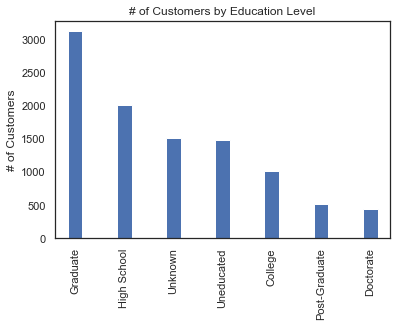

In [183]:
ax = df_categorical['Education_Level'].value_counts().plot(kind = 'bar',rot = 90, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Education Level')

When analyzing the majority of our clients, I can conclude that majority of our clients are either graduated or still in high school. Thus, to decrease the customer churn I believe we should have virtual conferences where we teach clients with clients about our products and how our products benefits them in both the short term and long term. We also have a little amount of customers who have completed their post graduate and doctorate studies, however I think we should market our products to increase the clients in these education level spectrum.

In [152]:
# Customer distribution rate by Marital Status

Text(0.5, 1.0, '# of Customers by Marital Status')

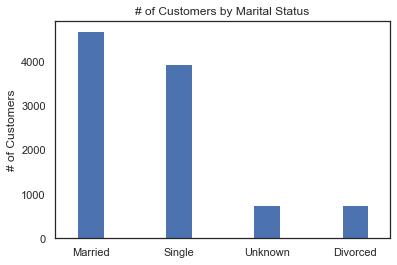

In [154]:
ax = df_categorical['Marital_Status'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Marital Status')

When analyzing the marital status of our clients, I believe that we should focus more on married and single clients as they consist of 80% of our clients.

# Correlation

Now we will use the pearson method to complete the correlation of this dataset!


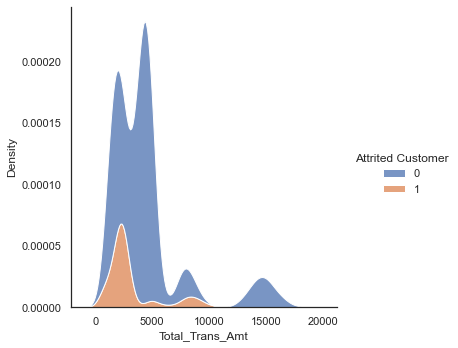

In [106]:
# measuring the relationship between total transaction amount by a customer and attrited customer
sns.displot(both, x="Total_Trans_Amt", hue="Attrited Customer", multiple="stack", kind="kde")

Through this visualization I am able to analyze that there are fewer to no churned customers when the total transaction amount exceeds 5000, whereas when the transaction is between 0 to 4000 we are able to see customers leaving our company.

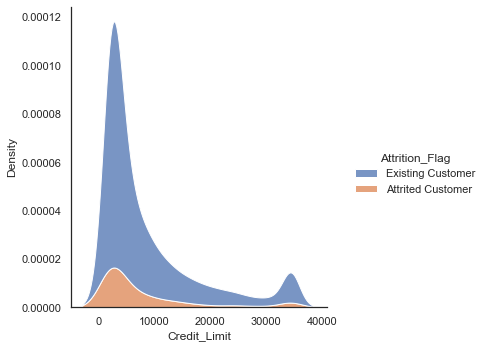

In [144]:
# measuring the relationship between credit limit and attrition flag
sns.displot(df_n, x="Credit_Limit", hue="Attrition_Flag", multiple="stack", kind="kde")

Through this visualization we are able to see that when the credit limit is lower than 10000 there are more attrited customer. However when the credit limit is over 10000 there are less attrited customer.

In [109]:
#Converting dataframe both to data_c with the help of .corr() function
data_c = both.corr()

In [130]:
#Renaming columns attrited customers to attrited
data_u=data_c.rename(columns={'Attrited Customer':'Attrited'})

In [131]:
data_u.dtypes

Customer_Age                float64
Dependent_count             float64
Months_on_book              float64
Total_Relationship_Count    float64
Months_Inactive_12_mon      float64
Contacts_Count_12_mon       float64
Credit_Limit                float64
Total_Revolving_Bal         float64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt             float64
Total_Trans_Ct              float64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Attrited                    float64
Divorced                    float64
Married                     float64
Single                      float64
College                     float64
Doctorate                   float64
Graduate                    float64
High School                 float64
Post-Graduate               float64
Uneducated                  float64
dtype: object

In [132]:
#Correlation among all the columns of dataframe data_u
data_u.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Attrited,Divorced,Married,Single,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,...,0.018203,-0.042614,0.047364,-0.011248,-0.014788,0.025199,-0.000203,0.001199,-0.022081,0.005057
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,...,0.018991,0.006697,0.014385,-0.040707,0.003369,-0.003368,0.000671,-0.013127,0.009459,0.002190
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,...,0.013687,-0.027678,0.033194,-0.005065,-0.010281,0.024114,0.003531,0.002637,-0.016703,0.001099
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,...,-0.150005,0.009276,0.017001,-0.017329,-0.013582,-0.009077,0.005397,-0.001707,0.012050,0.008202
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,...,0.152449,0.001796,-0.007065,0.008973,0.004038,0.002432,0.005885,-0.005575,-0.006240,0.010127


/var/folders/x6/nzby73792t956q8yhk8yst1r0000gn/T/ipykernel_9212/572363179.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_num, dtype=np.bool))


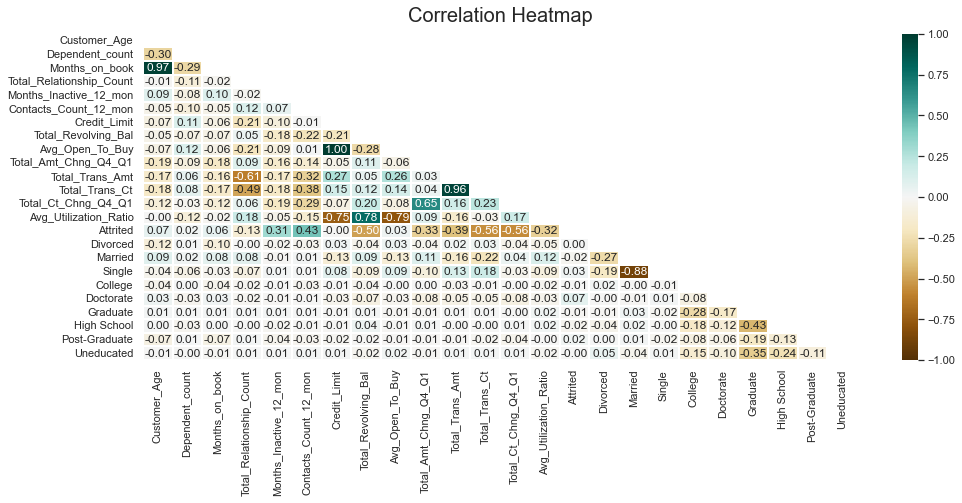

In [133]:
# Heatmap comparing all of the vairables together
from scipy import stats
corr_num = data_u.corr()
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(corr_num, dtype=np.bool))
num_heatmap = sns.heatmap(corr_num, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG',linewidths=2,fmt='.2f')
num_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

Here through this heatmap, I am able to see that customer who were contacted in the last 12 months regarding their credit card tend to stay with our company as contact count has a weak positive correlation with attrition rate

In [168]:
data_u = both.corr()

In [148]:
# comparing months inactive for the 12 months and attrited
df_nol = data_u[['Months_Inactive_12_mon','Attrited']]
df_nol.corr()

,Months_Inactive_12_mon,Attrited
Months_Inactive_12_mon,1.000000,0.308549
Attrited,0.308549,1.000000


Here we are able to analyze that when a client is inactive for 12 months or so the attrition rate is higher as there is a positive correlation between both the variables.

In [149]:
# Comparing attrited and total revolving balance
df_nol = data_u[['Attrited','Total_Revolving_Bal']]
df_nol.corr()

,Attrited,Total_Revolving_Bal
Attrited,1.000000,-0.501951
Total_Revolving_Bal,-0.501951,1.000000


Here we can see that total revolving balance on the credit card has a negative correlation with attrition rate. Therefore meaning whenever the total revolving balance is less on the credit card there will be more attrited customer churning.

I am able to conclude that when a **client is inactive for 12 months** **the client tends to leave the company**. Thus, *higher the inactive rate for a customer the higher the attrition rate*. We are also able to analyze that whenever the total transaction amount exceeds 5000, there are fewer to no churned customers.

We are able to see an increase customer churn rate **when the total transaction amount is between 0-5000**. When the *credit limit for a client is below 10000*, **the chance of them leaving the credit card company is higher when comparing with customers with a higher credit limit**.

We are also able to state the fact that on **average a customer stays with our company for almost 36 months** and **most of our customers are either married or single**. 

Thus we should contact the customer more often and give them more deals and offers so they increase their tenure with our company from 36 months, if the client is inactive for 12 months or less the client tends to leave the company. Thus to beat the attrition rate, we should have clients whose credit limit tends to stay higher than 10000.

To overcome customer churn we would have to tackle the variables stated above!